In [16]:
import h5py
import torch
import numpy as np
from neuralop.models import FNO
from tqdm import tqdm
import random

import argparse
import time

from eval_utils import compute_metrics
from custom_paths import get_results_path
from utils import set_seed, flatten_configdict
from acquisition.acquirers import select, select_time

from omegaconf import OmegaConf
import hydra
import wandb


class Traj_dataset:
    traj_train = None
    traj_valid = None
    traj_test = None

class cfg:
    equation = 'KdV'
    
initial_training_size = 100

device = 'cuda'
nt = 14

lr = 1e-3
epochs = 100
batch_size = 32

ensemble_size = 20


print('Loading training data...')
with h5py.File(f'data_large/{cfg.equation}_train_100000_default.h5', 'r') as f:
    # Traj_dataset.traj_train = torch.tensor(f['train']['pde_140-256'][:10000, :131], dtype=torch.float32, device=cfg.device)
    Traj_dataset.traj_train = torch.tensor(f['train']['pde_140-256'][:1000, :131], dtype=torch.float32)
    # Traj_dataset.traj_train = torch.tensor(f['train']['pde_140-256'][:100, :131], dtype=torch.float32, device=cfg.device)
# print('Loading validation data...')
# with h5py.File(f'data_large/{cfg.equation}_valid_1024_default.h5', 'r') as f:
#     Traj_dataset.traj_valid = torch.tensor(f['valid']['pde_140-256'][:, :131], dtype=torch.float32)
print('Loading test data...')
with h5py.File(f'data_large/{cfg.equation}_test_100000_default.h5', 'r') as f:
    # Traj_dataset.traj_test = torch.tensor(f['test']['pde_140-256'][:, :131], dtype=torch.float32)
    Traj_dataset.traj_test = torch.tensor(f['test']['pde_140-256'][:10000, :131], dtype=torch.float32)

timestep = (Traj_dataset.traj_train.shape[1] - 1) // (nt - 1) # 10
assert timestep == 10 # hardcoded for now (130/ (14-1) = 10)

X = Traj_dataset.traj_train[:initial_training_size,0].unsqueeze(1).to(device)
Y = Traj_dataset.traj_train[:initial_training_size,::timestep].to(device)

print(Y[0].norm(dim=-1))

Loading training data...
Loading test data...
tensor([14.7060, 14.7060, 14.7060, 14.7060, 14.7060, 14.7060, 14.7060, 14.7060,
        14.7060, 14.7060, 14.7060, 14.7060, 14.7060, 14.7060], device='cuda:0')


In [17]:
import h5py
import torch
import numpy as np
from neuralop.models import FNO
from tqdm import tqdm
import random

import argparse
import time

from eval_utils import compute_metrics
from custom_paths import get_results_path
from utils import set_seed, flatten_configdict
from acquisition.acquirers import select, select_time

from omegaconf import OmegaConf
import hydra
import wandb


class Traj_dataset:
    traj_train = None
    traj_valid = None
    traj_test = None

class cfg:
    equation = 'Burgers'
    
initial_training_size = 100

device = 'cuda'
nt = 14

lr = 1e-3
epochs = 100
batch_size = 32

ensemble_size = 20


print('Loading training data...')
with h5py.File(f'data_large/{cfg.equation}_train_100000_default.h5', 'r') as f:
    # Traj_dataset.traj_train = torch.tensor(f['train']['pde_140-256'][:10000, :131], dtype=torch.float32, device=cfg.device)
    Traj_dataset.traj_train = torch.tensor(f['train']['pde_140-256'][:1000, :131], dtype=torch.float32)
    # Traj_dataset.traj_train = torch.tensor(f['train']['pde_140-256'][:100, :131], dtype=torch.float32, device=cfg.device)
# print('Loading validation data...')
# with h5py.File(f'data_large/{cfg.equation}_valid_1024_default.h5', 'r') as f:
#     Traj_dataset.traj_valid = torch.tensor(f['valid']['pde_140-256'][:, :131], dtype=torch.float32)
print('Loading test data...')
with h5py.File(f'data_large/{cfg.equation}_test_100000_default.h5', 'r') as f:
    # Traj_dataset.traj_test = torch.tensor(f['test']['pde_140-256'][:, :131], dtype=torch.float32)
    Traj_dataset.traj_test = torch.tensor(f['test']['pde_140-256'][:10000, :131], dtype=torch.float32)

timestep = (Traj_dataset.traj_train.shape[1] - 1) // (nt - 1) # 10
assert timestep == 10 # hardcoded for now (130/ (14-1) = 10)

X = Traj_dataset.traj_train[:initial_training_size,0].unsqueeze(1).to(device)
Y = Traj_dataset.traj_train[:initial_training_size,::timestep].to(device)

print(Y[0].norm(dim=-1))

Loading training data...
Loading test data...
tensor([26606.2852, 25273.9844, 24234.1016, 23392.2891, 22692.7246, 22099.6445,
        21588.7871, 21142.9414, 20749.4824, 20398.8984, 20083.8730, 19798.6699,
        19538.7324, 19300.3945], device='cuda:0')


In [18]:
import h5py
import torch
import numpy as np
from neuralop.models import FNO
from tqdm import tqdm
import random

import argparse
import time

from eval_utils import compute_metrics
from custom_paths import get_results_path
from utils import set_seed, flatten_configdict
from acquisition.acquirers import select, select_time

from omegaconf import OmegaConf
import hydra
import wandb


class Traj_dataset:
    traj_train = None
    traj_valid = None
    traj_test = None

class cfg:
    equation = 'Burgers'
    
initial_training_size = 100

device = 'cuda'
nt = 14

lr = 1e-3
epochs = 100
batch_size = 32

ensemble_size = 20


print('Loading training data...')
with h5py.File(f'data_small/KS_train_1024_default.h5', 'r') as f:
    # Traj_dataset.traj_train = torch.tensor(f['train']['pde_140-256'][:10000, :131], dtype=torch.float32, device=cfg.device)
    Traj_dataset.traj_train = torch.tensor(f['train']['pde_140-256'][:1000, :131], dtype=torch.float32)
    # Traj_dataset.traj_train = torch.tensor(f['train']['pde_140-256'][:100, :131], dtype=torch.float32, device=cfg.device)
# print('Loading validation data...')
# with h5py.File(f'data_large/{cfg.equation}_valid_1024_default.h5', 'r') as f:
#     Traj_dataset.traj_valid = torch.tensor(f['valid']['pde_140-256'][:, :131], dtype=torch.float32)
print('Loading test data...')
with h5py.File(f'data_small/KS_test_4096_default.h5', 'r') as f:
    # Traj_dataset.traj_test = torch.tensor(f['test']['pde_140-256'][:, :131], dtype=torch.float32)
    Traj_dataset.traj_test = torch.tensor(f['test']['pde_140-256'][:10000, :131], dtype=torch.float32)

timestep = (Traj_dataset.traj_train.shape[1] - 1) // (nt - 1) # 10
assert timestep == 10 # hardcoded for now (130/ (14-1) = 10)

X = Traj_dataset.traj_train[:initial_training_size,0].unsqueeze(1).to(device)
Y = Traj_dataset.traj_train[:initial_training_size,::timestep].to(device)

print(Y[0].norm(dim=-1))

Loading training data...


Loading test data...
tensor([23.5167, 22.6700, 23.0099, 22.8612, 21.0051, 20.4621, 20.0028, 19.2077,
        19.5821, 21.1534, 22.0761, 22.2929, 22.2485, 23.0898], device='cuda:0')


In [23]:
import random

def simulate_ball_picking():
    # Initialize bins with random distribution of 30 balls
    bins = []
    remaining_balls = 30
    while remaining_balls > 0:
        if remaining_balls >= 10:
            bin_size = random.randint(0, 10)
        else:
            bin_size = random.randint(0, remaining_balls)
        bins.append(bin_size)
        remaining_balls -= bin_size
    
    while sum(bins) > 0:
        # Sort bins in descending order
        bins.sort(reverse=True)
        print(bins)
        # Pick one ball from each of the three fullest bins
        for i in range(3):
            if bins[i] > 0:
                bins[i] -= 1
            else:
                return False
        
        # Remove empty bins
        # bins = [b for b in bins if b > 0]
    
    return True

def run_simulations(num_simulations):
    for _ in range(num_simulations):
        if not simulate_ball_picking():
            return False
    return True

# Run 1000 simulations
result = run_simulations(1000)
print(f"All 1000 simulations succeeded: {result}")

[10, 9, 5, 3, 2, 1]
[9, 8, 4, 3, 2, 1]
[8, 7, 3, 3, 2, 1]
[7, 6, 3, 2, 2, 1]
[6, 5, 2, 2, 2, 1]
[5, 4, 2, 2, 1, 1]
[4, 3, 2, 1, 1, 1]
[3, 2, 1, 1, 1, 1]
[2, 1, 1, 1, 1, 0]
[1, 1, 1, 0, 0, 0]
[6, 6, 5, 4, 2, 2, 2, 2, 1, 0, 0, 0]
[5, 5, 4, 4, 2, 2, 2, 2, 1, 0, 0, 0]
[4, 4, 4, 3, 2, 2, 2, 2, 1, 0, 0, 0]
[3, 3, 3, 3, 2, 2, 2, 2, 1, 0, 0, 0]
[3, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0]
[2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0]
[2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[10, 8, 6, 5, 1, 0, 0]
[9, 7, 5, 5, 1, 0, 0]
[8, 6, 5, 4, 1, 0, 0]
[7, 5, 4, 4, 1, 0, 0]
[6, 4, 4, 3, 1, 0, 0]
[5, 3, 3, 3, 1, 0, 0]
[4, 3, 2, 2, 1, 0, 0]
[3, 2, 2, 1, 1, 0, 0]
[2, 1, 1, 1, 1, 0, 0]
[1, 1, 1, 0, 0, 0, 0]
[10, 9, 8, 3, 0]
[9, 8, 7, 3, 0]
[8, 7, 6, 3, 0]
[7, 6, 5, 3, 0]
[6, 5, 4, 3, 0]
[5, 4, 3, 3, 0]
[4, 3, 3, 2, 0]
[3, 2, 2, 2, 0]
[2, 2, 1, 1, 0]
[1, 1, 1, 0, 0]
[7, 6, 5, 5, 4, 2, 1]
[6, 5, 5, 4, 4, 2, 1]
[5, 4, 4, 4, 

## nt=nt_effective

In [2]:
import h5py
import torch
import numpy as np
import matplotlib.pyplot as plt

with h5py.File(f'data_large/KdV_train_100000_default.h5', 'r') as f:
    # Traj_dataset.traj_train = torch.tensor(f['train']['pde_140-256'][:10000, :131], dtype=torch.float32, device=cfg.device)
    first = torch.tensor(f['train']['pde_140-256'][:1000, :131], dtype=torch.float32)

with h5py.File(f'data/KdV_train_10000_default.h5', 'r') as f:
    # Traj_dataset.traj_train = torch.tensor(f['train']['pde_140-256'][:10000, :131], dtype=torch.float32, device=cfg.device)
    second = torch.tensor(f['train']['pde_140-256'][:1000, :131], dtype=torch.float32)



In [42]:
def GRF1D(xi, m=0, gamma=1, tau=5, sigma=5):
    # xi has shape (bs, s) distributed normally
    xi = xi.clone()
    bs = xi.shape[0:-1]
    s = xi.shape[-1]
    N = s//2 # Example value, adjust as needed

    my_const = 2 * torch.pi

    my_eigs = np.sqrt(2) * (np.abs(sigma) * ((my_const * torch.arange(1, N + 1, device=xi.device))**2 + tau**2) ** (-gamma / 2))
    my_eigs = my_eigs[None]
    xi_alpha = xi[..., :N]
    alpha = my_eigs * xi_alpha
    xi_beta = xi[..., N:]
    beta = my_eigs * xi_beta

    a = alpha / 2
    b = -beta / 2
    c = torch.cat((torch.flip(a,[-1]) - torch.flip(b,[-1]) * 1j, torch.ones(*bs, 1, device=xi.device) * (m + 0j), a + b * 1j), dim=-1)
    field = torch.fft.ifft(torch.fft.ifftshift(c,dim=-1), n=s,dim=-1) * (s)
    field = field.real
    return field


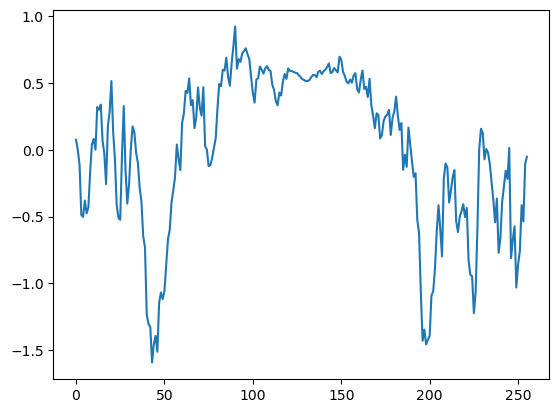

In [43]:
xi = torch.randn(1000, 256)
field = GRF1D(xi)
plt.plot(field[0])

In [31]:
field.shape

torch.Size([1000, 256])

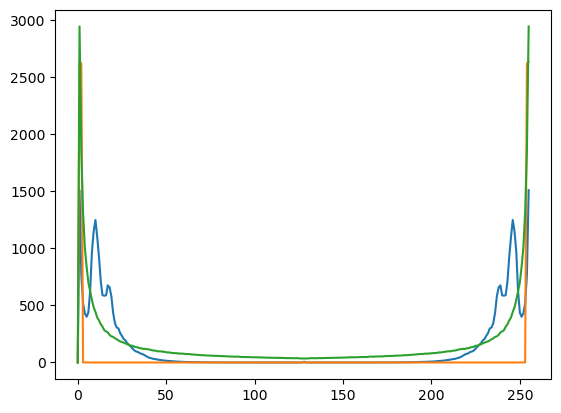

In [44]:
first_fft = torch.fft.fft(first[:,0], dim=1).norm(dim=0)

plt.plot(first_fft)

second_fft = torch.fft.fft(second[:,0], dim=1).norm(dim=0)

plt.plot(second_fft)

field_fft = torch.fft.fft(field, dim=1).norm(dim=0)

plt.plot(field_fft)

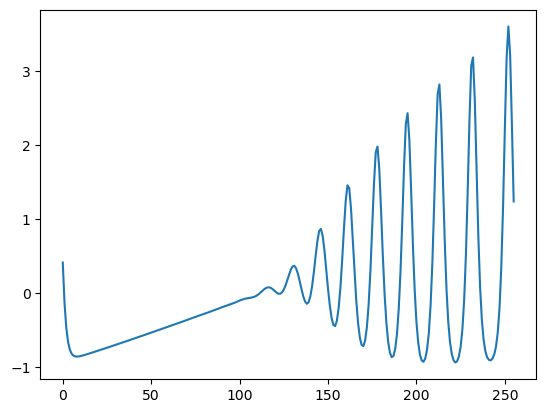

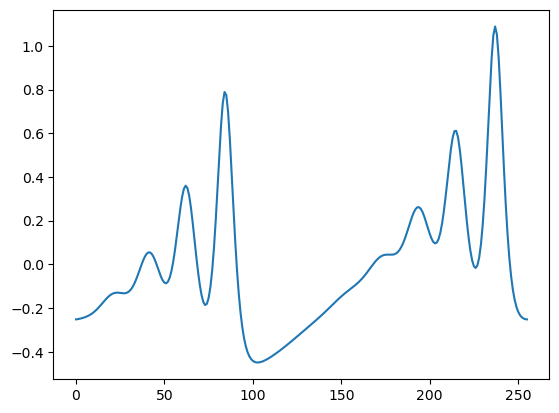

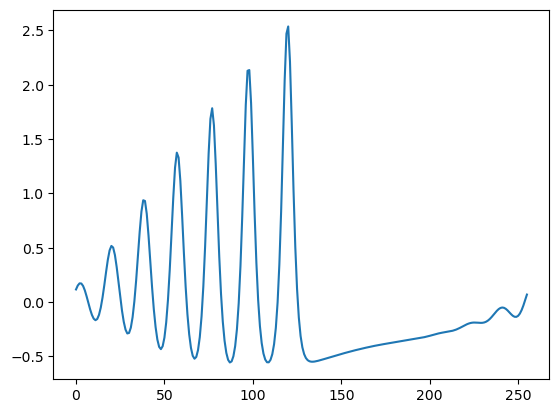

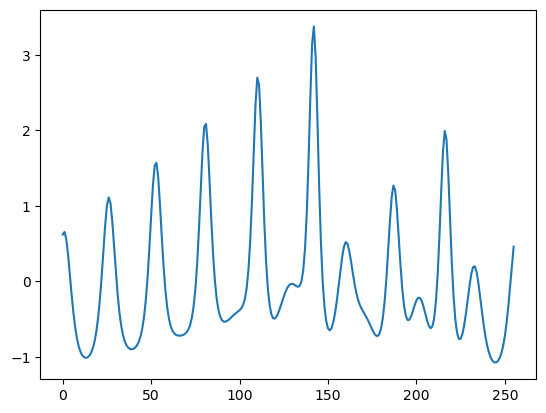

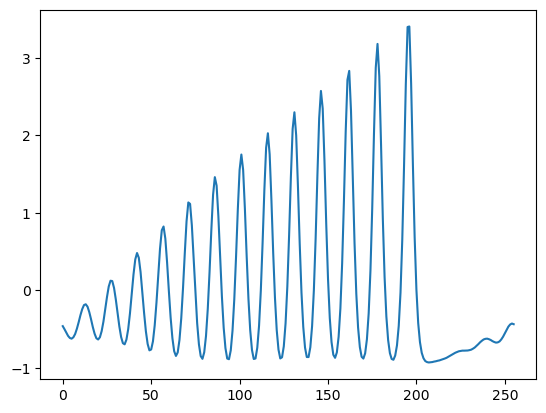

In [19]:
for idx in range(5):
    plt.figure()
    plt.plot(first[idx,0,:])

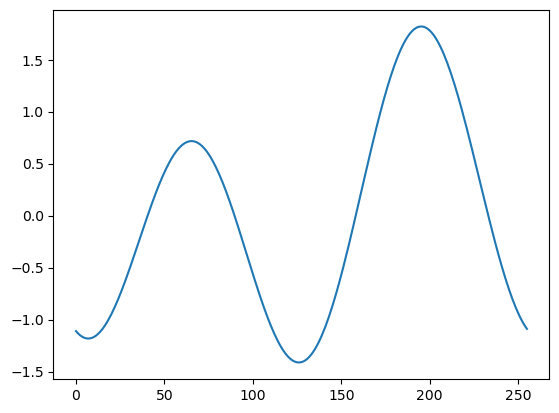

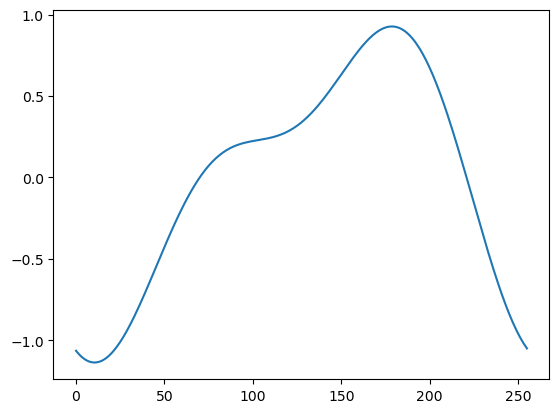

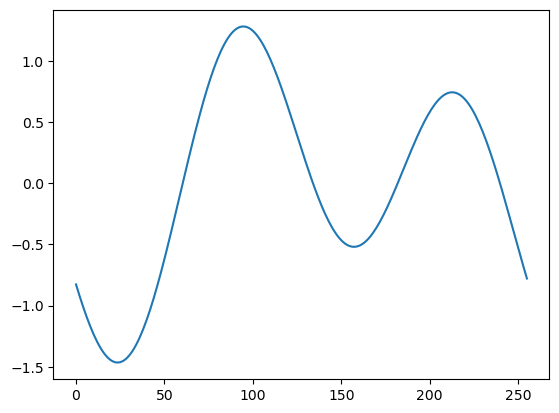

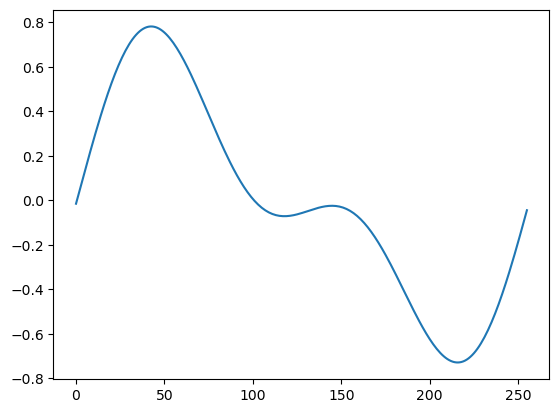

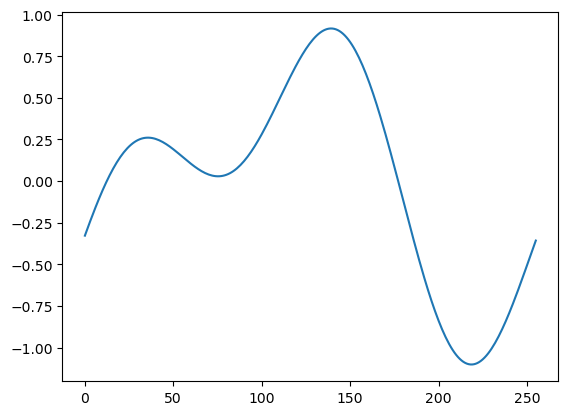

In [20]:
for idx in range(5):
    plt.figure()
    plt.plot(second[idx,0,:])